In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Model

In [ ]:
cnn= tf.keras.models.load_model("/content/trained_model.h5")

Performing Prediction on Single Image

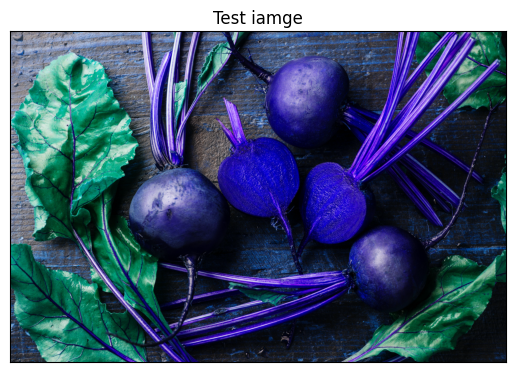

In [ ]:
import cv2
image_path = "/content/drive/MyDrive/Training model/test/beetroot/Image_1.jpg"
image = cv2.imread(image_path)
plt.imshow(image)
plt.title("Test iamge")
plt.xticks([])
plt.yticks([])
plt.show()

Testing model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [ ]:
print(predictions)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 3.4520004e-35 0.0000000e+00
  9.2832950e-18 0.0000000e+00 0.0000000e+00 2.4445291e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3828909e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 7.5520420e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training model/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names =None,
    batch_size = 32,
    image_size = (64,64),
    color_mode ='rgb',
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 369 files belonging to 36 classes.


In [ ]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0])

[2]


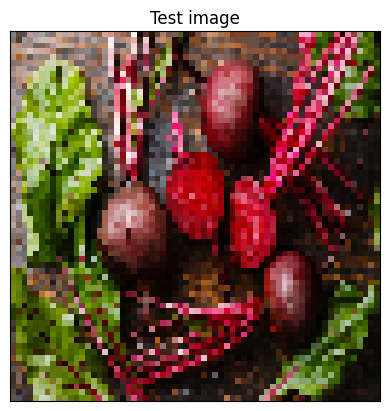

In [ ]:
plt.imshow(image)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a beetroot


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
file = open("labels.txt", "w")
for i in test_set.class_names:
  file.write([i]+'\n')
file.close()

TypeError: can only concatenate list (not "str") to list